## 准备数据

通过`sklearn`模拟出两组非线性划分的数据：

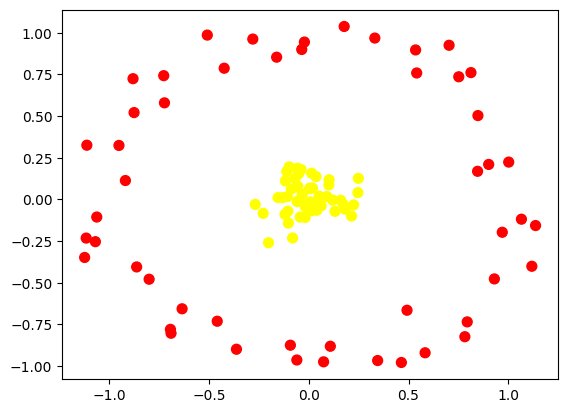

In [12]:
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt

X, y = make_circles(100, factor=.1, noise=.1)

fig, ax = plt.subplots()
ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

很明显没有线性分类器能够将上面的数据分开，但可以用一条椭圆曲线(非线性模型)将它们分开。我们可以进行一个非线性变换，将非线性问题变换为线性问题。例如使用以中央的数据群为中心的径向基函数，将二维空间的数据映射到三维，然后在三维空间里就可以用一个超平面将数据进行线性划分了。

Text(0.5, 0, 'r')

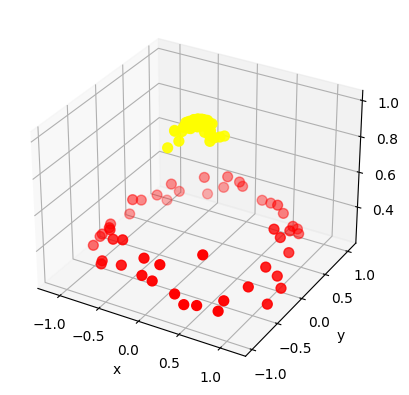

In [13]:
import numpy as np

# 将样本的特征值平方和，求其径向基函数的值，越靠近原点的数据越接近1
r = np.exp(-(X ** 2).sum(1))

ax = plt.subplot(projection='3d')
ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('r')

## 训练数据

`sklearn`的SVM模型提供了多种可选择的核函数，以实现非线性支持向量机。这里我们采用RBF(径向基函数)核：

In [14]:
from sklearn.svm import SVC

clf = SVC(kernel='rbf', C=1E6, gamma='auto')
clf.fit(X, y)

SVC(C=1000000.0, gamma='auto')

使用这个核化的支持向量机，我们得到了一条合适的非线性决定边界，如下图。这种核转换策略经常在机器学习中被使用在将线性方法转变为快速的非线性方法的场合，特别适合能运用核技巧的模型中。

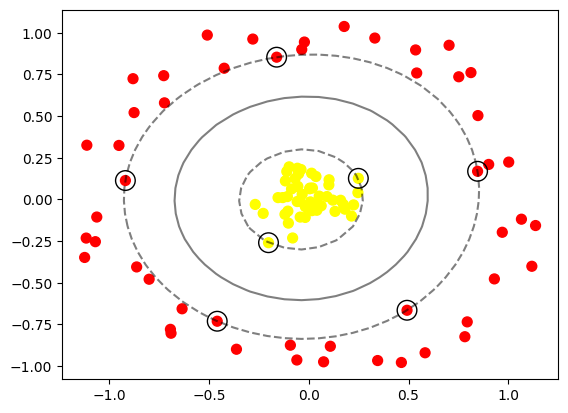

In [15]:
def plot_svc_decision_function(model, ax):
    """绘制2D SVC图像函数"""
    assert ax is not None
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # 创建网格来展示数据
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    # 超平面S在坐标(x,y)下对应的值
    P = model.decision_function(xy).reshape(X.shape)

    # 绘制边界和间距，即超平面S的等高线：f(x,y)=0, f(x,y)=1, f(x,y)=-1
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # 绘制支持向量
    ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],
                s=200, edgecolors='k', facecolors='none')

    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

fig, ax = plt.subplots()
ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, ax)